In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [56]:
vorp_df = pd.read_csv("vorp_dataset_final.csv").drop(columns = ["Unnamed: 0"])
vorp_df["GPS"] = round(vorp_df["GPS"], 1)
vorp_df

,Player,VORP,HOF?,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS
0,Álex Abrines,0.1,0,15.9,4.2,1.5,48.0,5.4,58.0
1,Jaylen Adams,-0.3,0,5.4,3.0,3.2,21.8,2.0,20.5
2,LaMarcus Aldridge,33.4,0,305.6,129.6,30.4,539.2,123.2,67.2
3,Shandon Anderson,3.0,0,74.0,31.0,14.0,222.0,28.0,71.9
4,Carmelo Anthony,36.7,0,427.5,117.8,51.3,655.5,152.0,66.3
...,...,...,...,...,...,...,...,...,...
194,Trevor Winter,0.0,0,0.0,3.0,0.0,5.0,0.0,1.0
195,Luther Wright,-0.2,0,1.3,0.7,0.0,6.1,0.5,15.0
196,Danny Young,6.6,0,46.0,12.0,29.0,166.0,17.0,57.4
197,Michael Young,0.2,0,13.8,5.4,1.5,28.8,5.7,16.3


In [57]:
X = vorp_df.drop(columns = ['Player', 'VORP'])
y = vorp_df['VORP']
y

0       0.1
1      -0.3
2      33.4
3       3.0
4      36.7
       ... 
194     0.0
195    -0.2
196     6.6
197     0.2
198     0.1
Name: VORP, Length: 199, dtype: float64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
c = lr.intercept_
c

-0.7633913275421014

In [62]:
m = lr.coef_
m
hof_coef = m[0]
ppgsp_coef = m[1]
rpgsp_coef = m[2]
apgsp_coef = m[3]
mpgsp_coef = m[4]
fgpgsp_coef = m[5]
gps_coef = m[6]

In [63]:
y_pred_train = lr.predict(X_train)
len(y_pred_train)


139

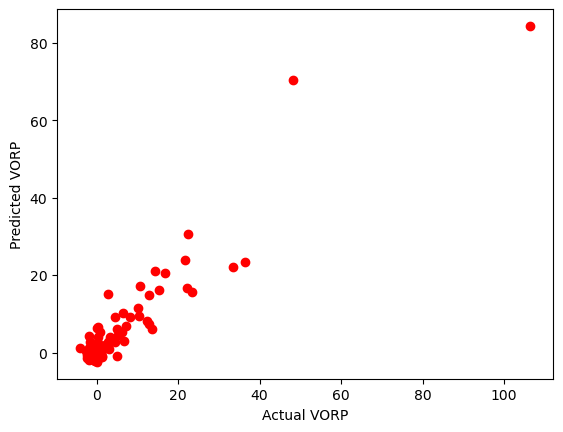

In [64]:
plt.scatter(y_train, y_pred_train, color='red')
plt.xlabel("Actual VORP")
plt.ylabel("Predicted VORP")
plt.show()

In [65]:
r2_score(y_train, y_pred_train)

0.88053635920492

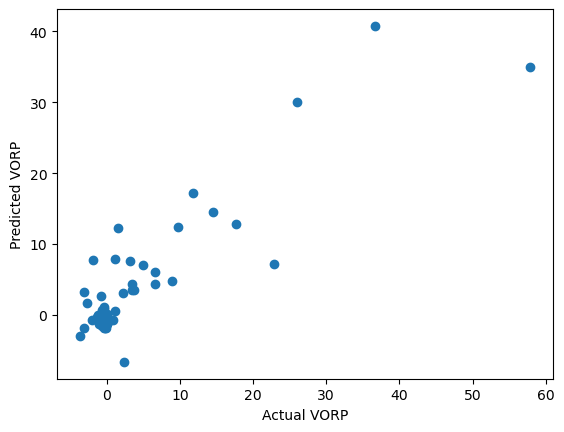

In [66]:
y_pred_test = lr.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual VORP")
plt.ylabel("Predicted VORP")
plt.show()

In [67]:
vorp_df['Predicted_VORP'] = (c + (vorp_df['HOF?']*hof_coef) + (vorp_df['PPG*SP']*ppgsp_coef) 
                             + (vorp_df['RPG*SP']*rpgsp_coef) + (vorp_df['APG*SP']*apgsp_coef) 
                             + (vorp_df['MPG*SP']*mpgsp_coef) + (vorp_df['FGPG*SP']*fgpgsp_coef) 
                             + (vorp_df['GPS']*gps_coef))

vorp_df['Predicted_VORP'] = round(vorp_df['Predicted_VORP'], 1)

In [68]:
vorp_df

,Player,VORP,HOF?,PPG*SP,RPG*SP,APG*SP,MPG*SP,FGPG*SP,GPS,Predicted_VORP
0,Álex Abrines,0.1,0,15.9,4.2,1.5,48.0,5.4,58.0,-2.4
1,Jaylen Adams,-0.3,0,5.4,3.0,3.2,21.8,2.0,20.5,-0.4
2,LaMarcus Aldridge,33.4,0,305.6,129.6,30.4,539.2,123.2,67.2,22.1
3,Shandon Anderson,3.0,0,74.0,31.0,14.0,222.0,28.0,71.9,0.8
4,Carmelo Anthony,36.7,0,427.5,117.8,51.3,655.5,152.0,66.3,40.8
...,...,...,...,...,...,...,...,...,...,...
194,Trevor Winter,0.0,0,0.0,3.0,0.0,5.0,0.0,1.0,-0.5
195,Luther Wright,-0.2,0,1.3,0.7,0.0,6.1,0.5,15.0,-1.3
196,Danny Young,6.6,0,46.0,12.0,29.0,166.0,17.0,57.4,4.4
197,Michael Young,0.2,0,13.8,5.4,1.5,28.8,5.7,16.3,-0.6


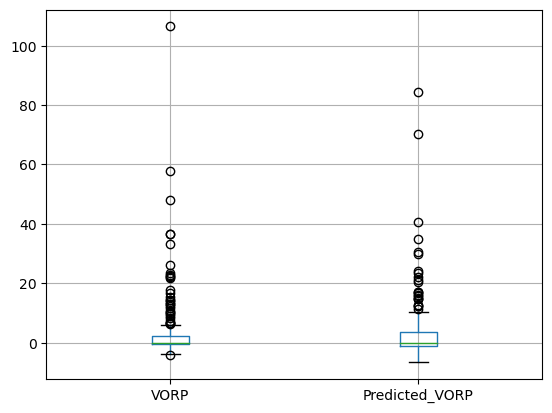

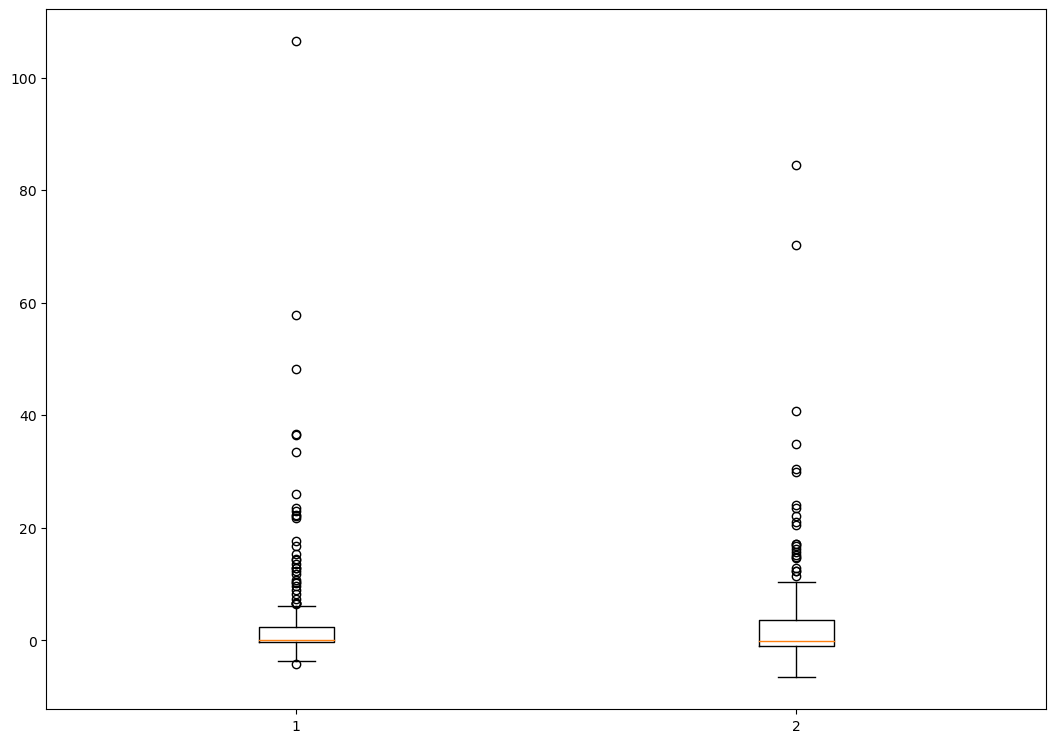

In [70]:

boxplot = vorp_df.boxplot(column=['VORP','Predicted_VORP'])
vorp_bxp= [vorp_df["VORP"],vorp_df["Predicted_VORP"]]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(vorp_bxp)
# plt.boxplot(vorp_bxp)
plt.show()


# data.columns=df.plot('VORP')

# VRP=vorp_df["VORP"]
# P_VRP=vorp_df["Predicted_VORP"]
# plt.boxplot(VRP,P_VRP)
# plt.show()

# df= vorp_df.boxplot(columns="VORP", by="Predicted_VORP", figsize=(8,4))
# df.set_ylabel("VORP")
# df.set_title("")